In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
x = np.array([(np.sqrt(5)-1)/2,0,(-np.sqrt(5)-1)/2]).reshape((-1, 1))
y = np.array([-1,3,-1])
model = LinearRegression()
model.fit(x, y)
print(f"y=: {model.coef_[0]}x+{model.intercept_}""")

y=: 0.5000000000000002x+0.5


In [2]:
from qiskit import QuantumCircuit, assemble, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_vector

In [21]:
state_prep=QuantumCircuit(1,0)
state_prep.h(0)
print(state_prep)

   ┌───┐
q: ┤ H ├
   └───┘


In [22]:
qft = QuantumCircuit(2,0)
qft.h(0)
qft.cs(1,0)
qft.h(1)
qft.swap(0,1)
print(qft)

     ┌───┐┌───┐        
q_0: ┤ H ├┤ S ├──────X─
     └───┘└─┬─┘┌───┐ │ 
q_1: ───────■──┤ H ├─X─
               └───┘   


In [23]:
iqft = QuantumCircuit(2,0)
iqft.swap(0,1)
iqft.h(1)
iqft.cp(-np.pi/2,1,0)
iqft.h(0)
print(iqft)

                       ┌───┐
q_0: ─X───────■────────┤ H ├
      │ ┌───┐ │P(-π/2) └───┘
q_1: ─X─┤ H ├─■─────────────
        └───┘               


In [33]:
qpe=QuantumCircuit(3,0)
qpe.h([0,1])
qpe.barrier()
qpe.cz(1,2)
qpe.cx(1,2)
qpe.cz(1,2)
qpe.barrier()
qpe=qpe.compose(iqft,[0,1])
print(qpe)

     ┌───┐ ░             ░                   ┌───┐
q_0: ┤ H ├─░─────────────░──X───────■────────┤ H ├
     ├───┤ ░             ░  │ ┌───┐ │P(-π/2) └───┘
q_1: ┤ H ├─░──■───■───■──░──X─┤ H ├─■─────────────
     └───┘ ░  │ ┌─┴─┐ │  ░    └───┘               
q_2: ──────░──■─┤ X ├─■──░────────────────────────
           ░    └───┘    ░                        


In [25]:
rys=QuantumCircuit(3,0)
rys.cry(np.pi,2,0)
rys.cry(np.pi/3,1,0)
print(rys)

     ┌───────┐┌─────────┐
q_0: ┤ Ry(π) ├┤ Ry(π/3) ├
     └───┬───┘└────┬────┘
q_1: ────┼─────────■─────
         │               
q_2: ────■───────────────
                         


In [34]:
iqpe=QuantumCircuit(3,0)
iqpe=iqpe.compose(qft,[0,1])
iqpe.barrier()
iqpe.cz(1,2)
iqpe.cx(1,2)
iqpe.cz(1,2)
iqpe.barrier()
iqpe.h([0,1])
print(iqpe)

     ┌───┐┌───┐         ░             ░ ┌───┐
q_0: ┤ H ├┤ S ├──────X──░─────────────░─┤ H ├
     └───┘└─┬─┘┌───┐ │  ░             ░ ├───┤
q_1: ───────■──┤ H ├─X──░──■───■───■──░─┤ H ├
               └───┘    ░  │ ┌─┴─┐ │  ░ └───┘
q_2: ───────────────────░──■─┤ X ├─■──░──────
                        ░    └───┘    ░      


In [36]:
hhl=QuantumCircuit(4,2)
hhl=hhl.compose(state_prep,[3])
hhl.barrier()
hhl=hhl.compose(qpe,[1,2,3])
hhl.barrier()
hhl=hhl.compose(rys,[0,1,2])
hhl.barrier()
hhl.measure(0,1)
hhl.barrier()
hhl=hhl.compose(iqpe,[1,2,3])
hhl.barrier()
hhl.measure(3,0)
print(hhl)

           ░                                               ░ ┌───────┐»
q_0: ──────░───────────────────────────────────────────────░─┤ Ry(π) ├»
           ░ ┌───┐ ░             ░                   ┌───┐ ░ └───┬───┘»
q_1: ──────░─┤ H ├─░─────────────░──X───────■────────┤ H ├─░─────┼────»
           ░ ├───┤ ░             ░  │ ┌───┐ │P(-π/2) └───┘ ░     │    »
q_2: ──────░─┤ H ├─░──■───■───■──░──X─┤ H ├─■──────────────░─────■────»
     ┌───┐ ░ └───┘ ░  │ ┌─┴─┐ │  ░    └───┘                ░          »
q_3: ┤ H ├─░───────░──■─┤ X ├─■──░─────────────────────────░──────────»
     └───┘ ░       ░    └───┘    ░                         ░          »
c: 2/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌─────────┐ ░ ┌─┐ ░                                          ░    
«q_0: ┤ Ry(π/3) ├─░─┤M├─░──────────────────────────────────────────░────
«     └────┬────┘ ░ └╥┘ ░ ┌───┐┌───┐         ░             ░ ┌

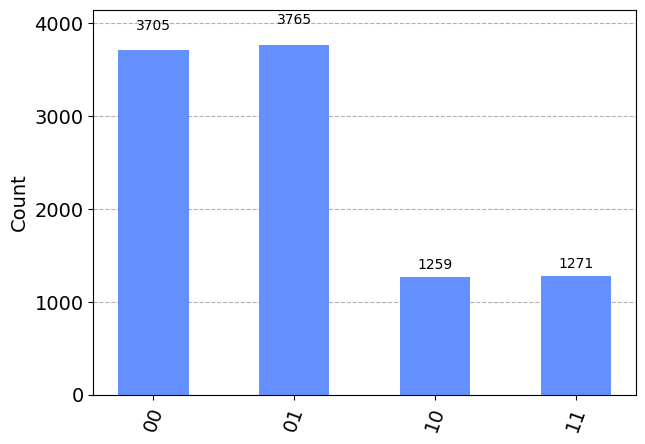

In [43]:
sim = Aer.get_backend('aer_simulator')
qobj = transpile(hhl, sim)
result = sim.run(qobj,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts)